In [1]:
import torch
import matplotlib.pyplot as plt
from case_studies.dc2_mdt.utils.new_simulate_image import ImageSimulator

In [2]:
image_size = 4
max_objects = 2

In [3]:
image_simulator = ImageSimulator(img_height=4,
                                 img_width=4,
                                 max_objects=max_objects,
                                 psf_stdev=1.0,
                                 flux_alpha=10.0,
                                 flux_beta=0.01)

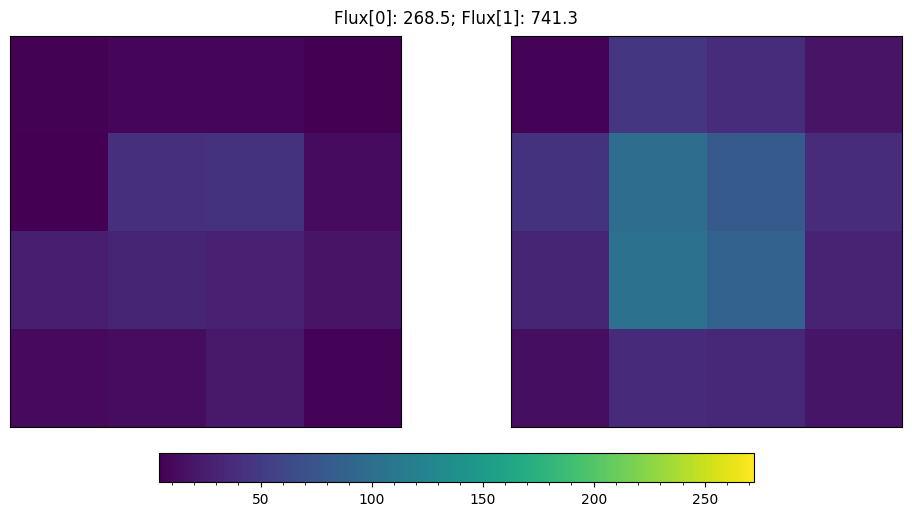

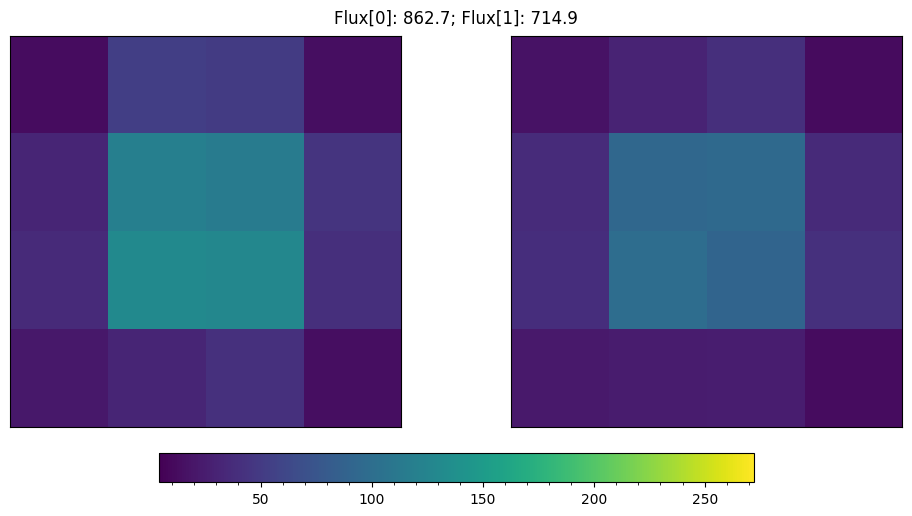

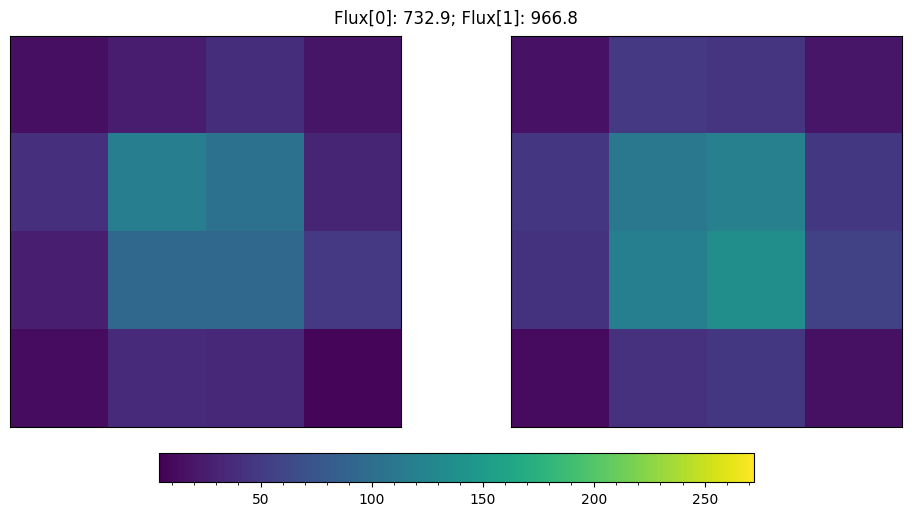

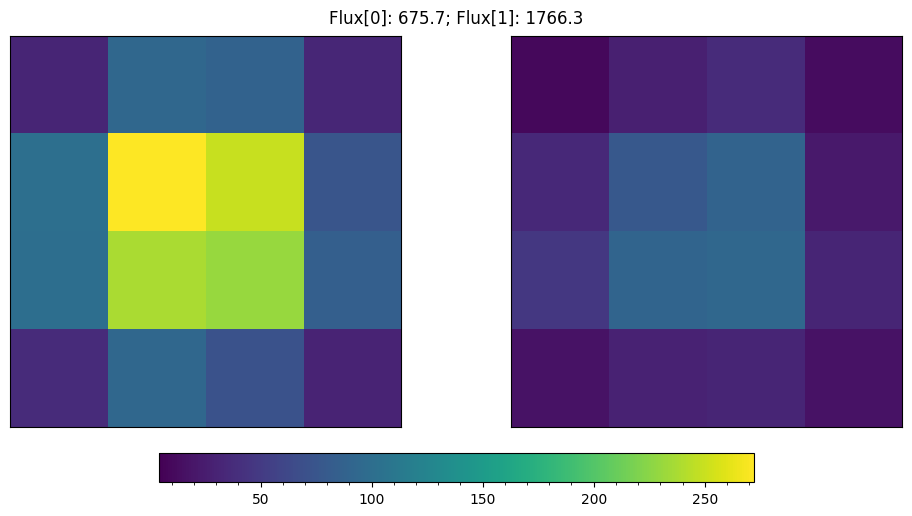

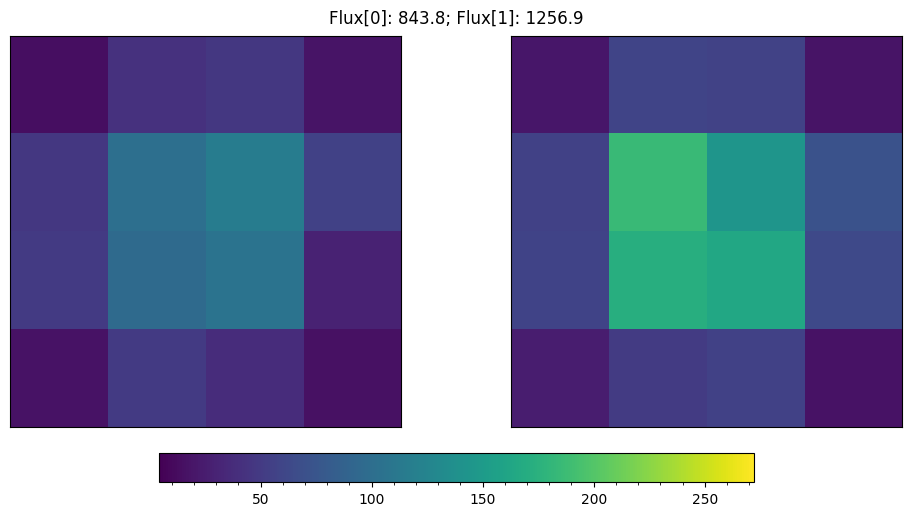

In [4]:
outputs = image_simulator.generate(batch_size=5, seed=8282)
images = outputs["images"].permute([0, 3, 1, 2])
fluxes = outputs["fluxes"]
img_max = images.max()
img_min = images.min()
for sub_img, flux in zip(images, fluxes):
    fig, axes = plt.subplots(1, max_objects, figsize=(max_objects * 5, 5), constrained_layout=True)
    axes = axes.flatten()
    for ax, ss_img in zip(axes, sub_img, strict=True):
        im = ax.imshow(ss_img.cpu(), vmin=img_min, vmax=img_max)
        ax.set_xticks([])
        ax.set_yticks([])
    cb = fig.colorbar(im, ax=axes, 
                    location="bottom", shrink=0.6,
                    anchor=(0.5, 2.0))
    cb.minorticks_on()
    fig.suptitle("; ".join([f"Flux[{i}]: {f.item():.1f}" for i, f in enumerate(flux)]))
    fig.show()

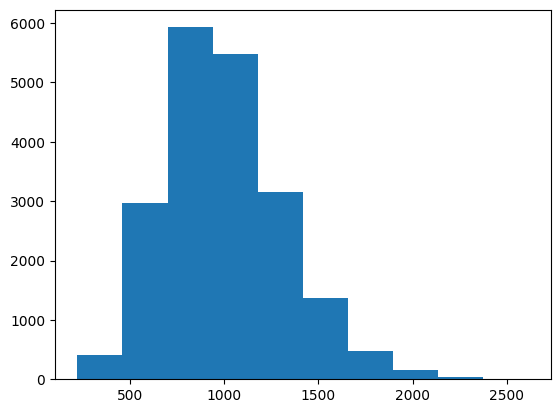

In [5]:
outputs = image_simulator.generate(batch_size=10_000)
fluxes = outputs["fluxes"]
plt.hist(fluxes.flatten().cpu())
plt.show()

In [6]:
fluxes.max()

tensor(2613.1772)

In [7]:
fluxes.min()

tensor(222.4009)

In [8]:
outputs["psf"].shape

torch.Size([10000, 4, 4, 2])

In [9]:
outputs["source_intensities"].shape

torch.Size([10000, 4, 4, 2])

In [10]:
post_dist = image_simulator.post_dist(outputs)

In [11]:
post_dist

MixtureSameFamily(
  Categorical(probs: torch.Size([10000, 2]), logits: torch.Size([10000, 2])),
  Gamma(concentration: torch.Size([10000, 2]), rate: torch.Size([10000, 2])))

In [12]:
post_dist.batch_shape

torch.Size([10000])

In [13]:
post_dist.event_shape

torch.Size([])

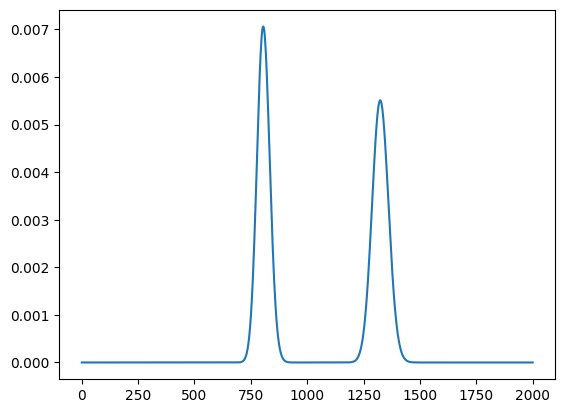

In [14]:
x = torch.linspace(0, 2000, 1000)
plt.plot(x, post_dist.log_prob(x.view(-1, 1))[:, 1000].exp())
plt.show()